<h1>Facebook Marketplace Analyzer</h1>

<h2>1.1 Intro:</h2>

<p>Market analysis is a tool most companies use for an informed decision, usually aspiring to avoid losing time and money. These are a few advantages when pursuing qualitative research: Market analysis may offer better opportunities, reveal competition structure, and explore the target audience’s desires (Sergey Ermakovich). This report will conduct a market analysis of the automobile industry in the Facebook Marketplace. By applying computational techniques to filter out the best affordable vehicles according to conditions such as price, mileage, and age. The objective is to highlight the ideal candidates in the current market for purchase.</p>

<h2>1.2 Background:</h2>

<p>I have been able to purchase a couple of vehicles using the Facebook Marketplace in the past because one of my hobbies is working on cars. Facebook market is my preference when looking at the vehicle market in Illinois. However, the search engine presents limitations when representing big data from the products offered. Questions such as: Is this the best price for a specific car model and year on the current market? Arise when purchasing a vehicle. Looking at every product on Facebook is time-consuming and challenging. Therefore, I want to use the tools learned from this course to assist myself in making a more informed decision when purchasing a car.</p>

<h2>1.3 Objectives:</h2>

<ol> 
    <li>Create an algorithm that web-scraps Facebook Marketplace and stores data in a CSV file.</li>
    <li>Create the necessary functions to process data into the scope of the research.</li>
    <li>Filter and find the the top five most offered vehicles in Illinois.</li>
    <li>Find the average sell price of vehicles by manufacturer.</li>
    <li>Find the average mileage of vehicles by manufacturer.</li>
    <li>Find the average year of vehicles by manufacturer.</li>
    <li>Reflect on the results and determine if the vehicle is worth it or not.</li>
</ol>

<h2>1.4 Why Facebook Marketplace and not others:</h2>

<p>There are several websites to search used vehicles, some offering more information than others. However, the app designed for this project only scraps Facebook Marketplace. One of the reasons is that Facebook Marketplace has more active users than Craiglist (CNBC). Another reason is due to my own experience. The Marketplace allows users to communicate with sellers through messenger. This method tends to be faster than other platforms such as Craiglist. Quick and trustful communication are keys when setting an inspection with a vendor. </p>

<h2>2 The scrapping app</h2>

<p>The Marketplace analyzer app scraps the Facebook Marketplace through the Selenium module and stores the data into a CSV file:</p>

<em><strong>2.1 Setting the Selenium module.</strong></em>

In [421]:
# modules
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

# create classes instances 
service = Service(executable_path='/Users/erickgonzalez/chromedriver')
driver = webdriver.Chrome(service=service)

# get url
url = "https://www.facebook.com/"
driver.get(url)

<em><strong>2.2 Go to the URL returning a general vehicle search.</strong></em>

In [440]:
# get general vehicle Marketplace URL

url = "https://www.facebook.com/marketplace/category/carros/"
driver.get(url)

<em><strong>2.3 Scrap, validate, print and store data in CSV file.</strong></em>

In [464]:
from selenium.webdriver.common.by import By
import os
import csv
import pandas as pd

def scrap():
    """Scrap Marketplace
    @return data Selenium object"""
    
    # get all vehicles objects from Marketplace
    data = driver.find_elements(By.XPATH,"//div[@class='x9f619 x78zum5 x1r8uery xdt5ytf x1iyjqo2 xs83m0k x1e558r4 x150jy0e xnpuxes x291uyu x1uepa24 x1iorvi4 xjkvuk6']")

    # print total entries
    print ('Total cars in memory: ' + str(len(data)))
    print('-----------------------------------------')

    return data

def validate (d):
    """Validate scrapped data,
    @return data list"""

    data =[]

    for index,car in enumerate(d):

        # validate if is not an advertisement or an empty entry
        if 'Publicidad' not in car.text and car.text != "":

            # create an array of strings
            entrie = car.text.splitlines()

            # clean unnecessary data
            try: 
                if (entrie[1].startswith('$')):

                        entrie.pop(1)
            except: 
                print("Error: Bad input, list size. ##Validation functions to filter bad data")

            # validate size of entry
            if(len(entrie)==4):

                #store in data structure
                data.append(entrie)
    
    return data

def printData(d):
    """Print results in pandas dataframe"""

    # create a class from pandas module
    df = pd.DataFrame(d)

    print(df)
    
def saveInCSV(d):
    """Store data list in CSV file 
    @return d list"""

    # check if file exists
    if os.path.exists('data.csv'):
        m = "a"
    else:
        m = "w"

    #open file
    with open("data.csv", m) as csvfile:

       # store
        write = csv.writer(csvfile)    
        write.writerows(d)
    
    return d
    
printData(saveInCSV(validate(scrap())))
    

Total cars in memory: 376
-----------------------------------------
           0                                                  1  \
0    $10.890               2011 Land Rover lr4 Sport Utility 4D   
1     $4.050  2006 Land Rover range rover sport Supercharged...   
2     $9.999   2012 Land Rover range rover HSE Sport Utility 4D   
3     $4.200  2004 Land Rover range rover Westminster Sport ...   
4     $5.500  1995 Land Rover range rover County LWB Sport U...   
..       ...                                                ...   
320  $11.900                    2003 Hummer h2 Sport Utility 4D   
321   $4.500               2006 Honda pilot LX Sport Utility 4D   
322  $48.587  2020 Land Rover range rover evoque P300 R-Dyna...   
323   $4.500  2011 Land Rover range rover sport HSE Sport Ut...   
324  $15.999   2013 Land Rover range rover HSE Sport Utility 4D   

                        2               3  
0             Chicago, IL  141 mil millas  
1             Chicago, IL  160 mil mill

<h2>3 Processing data</h2>

<em><strong>3.1 Create a market dictionary containing all entries from CSV file.</strong></em>

In [5]:
import csv

def readCSV():
    """Import data from CSV
    @return data list"""
    
    # opening the CSV file
    with open('data.csv', mode ='r')as file:
        
        csvFile = csv.reader(file)
        
        for line in csvFile:
            addToMarket(line)        
        
def addToMarket(line):
    """add CSV lines into market dictionary"""

    # create key
    carModel = createCarModel(line[1])

    if not carModel in market:

        # create entry
        market[carModel]={}
        market[carModel]["price"]=[]
        market[carModel]["year"]=[]
        market[carModel]["location"]=[]
        market[carModel]["mileage"]=[]


    #store entry
    market[carModel]["price"].append(getPrice(line[0]))
    market[carModel]["year"].append(getYear(line[1]))
    market[carModel]["location"].append(line[2])
    market[carModel]["mileage"].append(getMileage(line[3]))
        

def createCarModel(s):
    """ Get brand model of the title string
    @return string"""
    
    exclusions=["Land","Alfa","Range"]
     
    try:
        family = s.split()[1]
        
        if (len(s)>2):
            # get second and third word from title string
            model = s.split()[2]

        # check that is not a family of two words
        if (family in exclusions):
            try:
                # create string
                return family + " " + model + " " + s.split()[3]
            except:
                print("Error: Bad String, ## createCarModel() , string ='"+s+"'")
    
        # create string
        return family + " " + model
    except:
        print("Error: Bad line, ## createCarModel() , string ='"+s+"'" )

def getPrice(s):
    """ Get price from price string
    @return float"""
    
    try:
        return float(s[1:].replace('.',''))
    except:
        print("Error: validating string ## getPrice() , string ='"+s+"'" )

def getYear(s):
    """ Get year from title string
    @return int"""
    
    try:
        return int(s.split()[0])     
    except:
        print("Error: validating string ## getYear() , string ='"+s+"'" )

def getMileage(s):
    """Get mileage from mileage string
    @return int"""
    
    try:
        return int(s.split()[0])     
    except:
        print("Error: validating string ## getMileage() , string ='"+s+"'" )
        
def processNumbers(l,s):
    """Validates list, no strings and numbers that will compromise the report.
    @param l list 
    @param s string
    @return l list cleaned list"""
    
    # prices more than 500 and less than 50000
    if (s == "p"):
        l=[num for num in l if isinstance(num, (int,float)) and num > 500 and num <50000]
    
    # years more than 1900 and less than 2024
    if (s == "y"):
        l=[num for num in l if isinstance(num, (int,float)) and num > 1900 and num <2024]
        
    # miles more than 5 and less than 400
    if (s == "m"):
        l=[num for num in l if isinstance(num, (int,float)) and num > 5 and num <400]
    return l;

market={}        
readCSV()

Error: validating string ## getMileage() , string ='1,9 mil millas'
Error: validating string ## getPrice() , string ='Gratis'
Error: validating string ## getPrice() , string ='Gratis'
Error: validating string ## getPrice() , string ='Gratis'
Error: validating string ## getPrice() , string ='Gratis'
Error: validating string ## getPrice() , string ='Gratis'
Error: Bad line, ## createCarModel() , string ='1982 Oldsmobile'
Error: validating string ## getMileage() , string ='1,2 mil millas'
Error: validating string ## getMileage() , string ='1,1 mil millas'
Error: validating string ## getMileage() , string ='1,6 mil millas'
Error: validating string ## getMileage() , string ='6,7 mil millas'
Error: Bad line, ## createCarModel() , string ='1995 Chevrolet'
Error: Bad line, ## createCarModel() , string ='2003 Chevrolet'
Error: validating string ## getMileage() , string ='1,7 mil millas'
Error: validating string ## getPrice() , string ='Gratis'
Error: validating string ## getMileage() , string =

<em><strong>3.2 Create market report from market dictionary.</strong></em>

In [7]:
from statistics import mean
from statistics import median

def createReport():
    """Create a report from dictionary object
    @return results dictionary"""
    
    results = {}

    for carModel in market:

        results[carModel]={}
        
        try:

            # count models in current market
            results[carModel]["# entries"] = len(market[carModel]["price"])
            
            # validate list of numbers
            prices = processNumbers(market[carModel]["price"],"p")
            years = processNumbers (market[carModel]["year"],"y") 
            mileages = processNumbers(market[carModel]["mileage"],"m")

            # mean results
            results[carModel]["mean price"] = mean(prices)
            results[carModel]["mean year"] = mean(years)
            results[carModel]["mean mileage"] = mean(mileages)
            
            # median results
            results[carModel]["median price"] = median(prices)
            results[carModel]["median year"] = median(years)
            results[carModel]["median mileage"] = median(mileages)

            # min results
            results[carModel]["min price"] = min(prices)
            results[carModel]["min year"] = min(years)
            results[carModel]["highest mileage"] = max(mileages)

            # max results
            results[carModel]["max price"] = max(prices)
            results[carModel]["max year"] = max(years)
            results[carModel]["lowest mileage"] = min(mileages)

        
        except:
            print("Error, report entry not created. ## createReport() :",carModel)

    return results

report = createReport()
    

Error, report entry not created. ## createReport() : Buick grand
Error, report entry not created. ## createReport() : Ford other
Error, report entry not created. ## createReport() : Chevrolet SS
Error, report entry not created. ## createReport() : Chevrolet tornado
Error, report entry not created. ## createReport() : Chevrolet 2500hd
Error, report entry not created. ## createReport() : Ford box
Error, report entry not created. ## createReport() : Ford mach
Error, report entry not created. ## createReport() : Honda cm
Error, report entry not created. ## createReport() : Honda crf450
Error, report entry not created. ## createReport() : Yamaha xs
Error, report entry not created. ## createReport() : Honda grom
Error, report entry not created. ## createReport() : Honda ruckus
Error, report entry not created. ## createReport() : Honda cb500f
Error, report entry not created. ## createReport() : Nissan d21
Error, report entry not created. ## createReport() : Infiniti qx4
Error, report entry no

<h2>4 Observations</h2>

<em><strong>4.1 Print report with all entries:</strong></em>

<p>The following table shows the report from the scraping algorithm. Every car model has their mean, median, min, and max values by price, year, and mileage. Such insights are helpful to the user when looking for a vehicle in the Marketplace.</p>

In [8]:
import pandas as pd

# Print Results
df =pd.DataFrame(report)
df = df.transpose()
df = df.sort_values(by="# entries",ascending=False)
df.style.format({"# entries":"{:0>3,.0f}",
                 "mean price":"${0:,.2f}",
                 "mean mileage":"{:.2f}",
                 "mean year":"{:.0f}",
                 "median price":"${0:,.2f}",
                 "median mileage":"{:.2f}",
                 "median year":"{:.0f}",
                 "min price":"${0:,.2f}",
                 "lowest mileage":"{:.2f}",
                 "min year":"{:.0f}",
                 "max price":"${0:,.2f}",
                 "highest mileage":"{:.2f}",
                 "max year":"{:.0f}"})



,# entries,mean price,mean year,mean mileage,median price,median year,median mileage,min price,min year,highest mileage,max price,max year,lowest mileage
Jeep grand,424,"$8,648.54",2008,140.72,"$5,350.00",2008,140.00,$600.00,1986,334.00,"$42,980.00",2022,12.00
Jeep wrangler,340,"$13,590.31",2006,129.63,"$11,500.00",2007,131.00,"$1,000.00",1973,307.00,"$45,000.00",2023,8.00
Hyundai sonata,332,"$6,811.61",2012,123.48,"$6,500.00",2013,122.00,$800.00,2001,288.00,"$29,500.00",2022,8.00
Toyota camry,325,"$7,045.26",2008,154.11,"$5,500.00",2009,150.00,$700.00,1993,350.00,"$27,990.00",2022,16.00
GMC sierra,312,"$11,901.87",2007,152.99,"$8,200.00",2006,160.00,$700.00,1985,350.00,"$49,995.00",2023,9.00
Hyundai elantra,285,"$6,498.77",2013,113.15,"$6,375.00",2013,110.00,$900.00,2000,246.00,"$24,000.00",2021,10.00
BMW series,279,"$7,234.09",2006,134.05,"$6,000.00",2007,131.00,$950.00,1977,336.00,"$35,500.00",2020,7.00
Nissan altima,260,"$5,347.93",2011,131.59,"$4,300.00",2012,130.00,$800.00,1993,356.00,"$24,200.00",2022,12.00
Dodge ram,257,"$7,269.98",2004,171.47,"$5,210.00",2003,170.00,$800.00,1992,397.00,"$39,900.00",2021,11.00
Honda civic,252,"$4,616.25",2005,149.13,"$3,600.00",2006,157.50,$600.00,1972,300.00,"$25,000.00",2021,10.00


<em><strong>4.2 Plot top five most popular vehicles in Facebook Marketplace:</strong></em>

<p>This plot shows that the most popular vehicles in the Illinois market are: Jeep Grand Cherooke (over 420 entries), Jeep Wrangler (between 340 entries), Hyundai Sonata (less than 340 entries), Toyota Camry (over 320 entries), and the GMC Sierra (less than 320 entries).</p>

<AxesSubplot: >

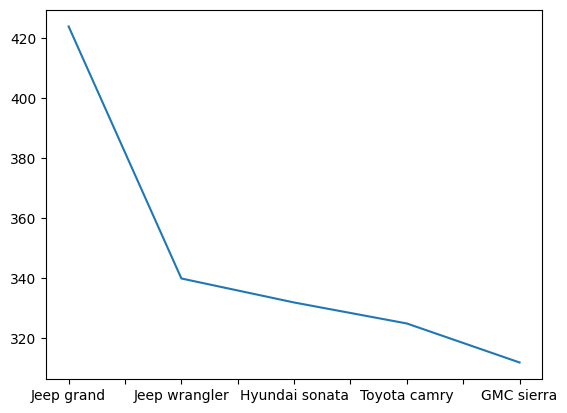

In [67]:
import matplotlib.pyplot as plt

df["# entries"][0:5].plot()

<em><strong>4.3 Mean price of top five five most popular vehicles:</strong></em>

<p>The jeep wrangler and the GMC Sierra have the highest mean price, while the Hyundai Sonata and the Toyota Camry have the lowest mean price in this graph.</p>

<AxesSubplot: >

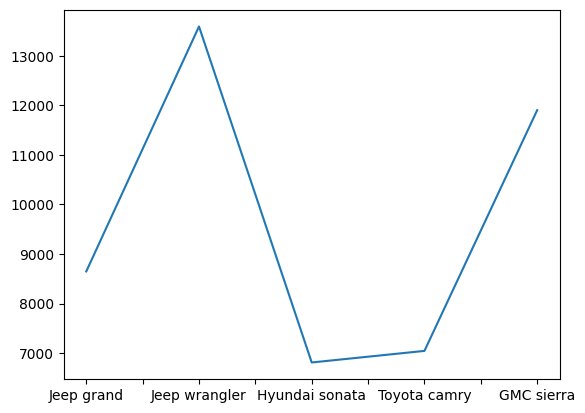

In [22]:
df["mean price"][0:5].plot()

<em><strong>4.4 Median price of top five  most popular  most popular vehicles:</strong></em>

<p>The median results print a similar graph as the median, reinforcing that the data is trustworthy.</p> 

<AxesSubplot: >

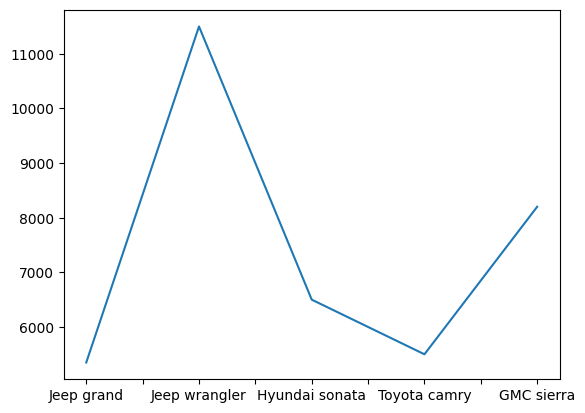

In [24]:
df["median price"][0:5].plot()

<em><strong>4.5 Mean mileage of top five most popular vehicles:</strong></em>

<p>The Hyundai Sonata nad the Jeep Wrangler have the lowest mean mileage in the market, while the Toyota Camry and the GMC Sierra have the highest mean. </p> 

<AxesSubplot: >

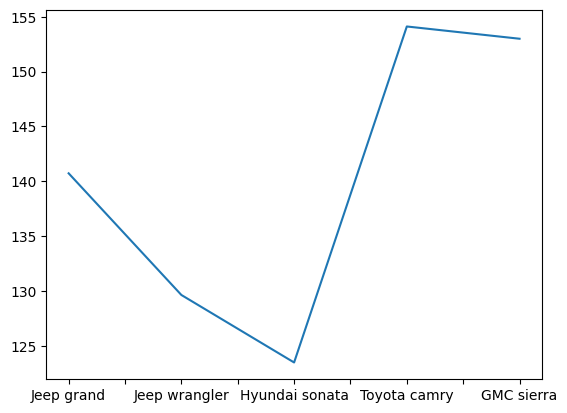

In [25]:
df["mean mileage"][0:5].plot()

<em><strong>4.6 Median mileage of top five entries</strong></em>

<p>The median graph is very similar to the mean. </p> 

<AxesSubplot: >

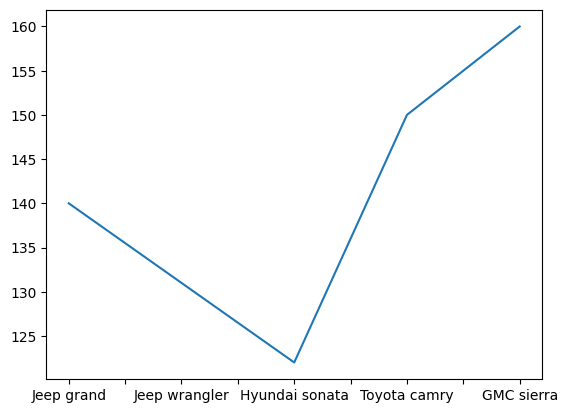

In [26]:
df["median mileage"][0:5].plot()

<em><strong>4.7 Mean mileage of top five entries</strong></em>

<p>The Hyundai Sonata is the newest vehicle more likely to find in the market, while the Jeep Wrangler is the oldest one. There is a four-year difference between the Hyundai vehicle and the others.</p> 

<AxesSubplot: >

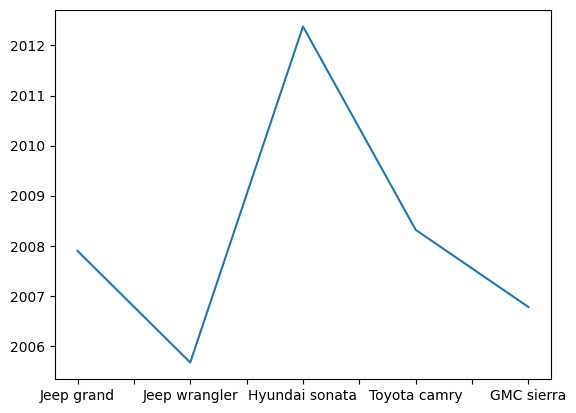

In [27]:
df["mean year"][0:5].plot()

<em><strong>4.8 Median mileage of top five entries</strong></em>

<p>The median graph is very similar to the mean.</p> 

<AxesSubplot: >

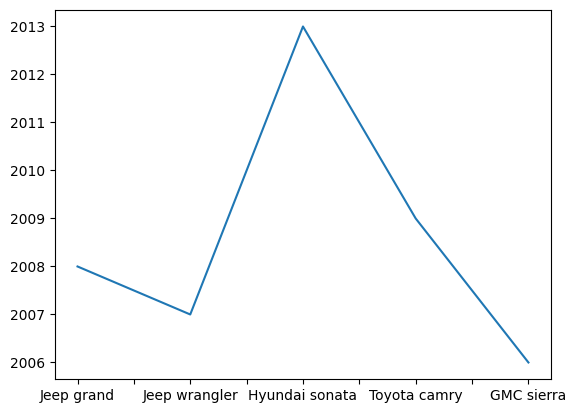

In [28]:
df["median year"][0:5].plot()

<em><strong>4.9 Jeep Grand Cherokee insights (Most popular vehicle in market): </strong></em>

<ul>
    <li>"Average price: 8648.54 USD</li>
    <li>Median price: 5350.00 USD</li>
    <li>Lowest price: 600.00 USD</li>
    <li>Highest price: 42980.00 USD</li>
</ul>


<AxesSubplot: >

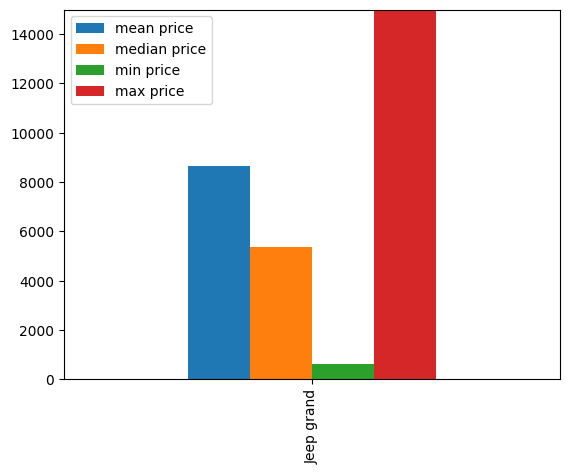

In [65]:
df[["mean price","median price","min price","max price"]][0:1].plot.bar(ylim=[0,15000])

<em><strong>4.10 Jeep Grand Cherokee insights (Most popular vehicle in market): </strong></em>

<ul>
    <li>"Average year: 2008</li>
    <li>Median year: 2008</li>
    <li>Oldest model: 1986</li>
    <li>Earliest model: 2022</li>
</ul>

<AxesSubplot: >

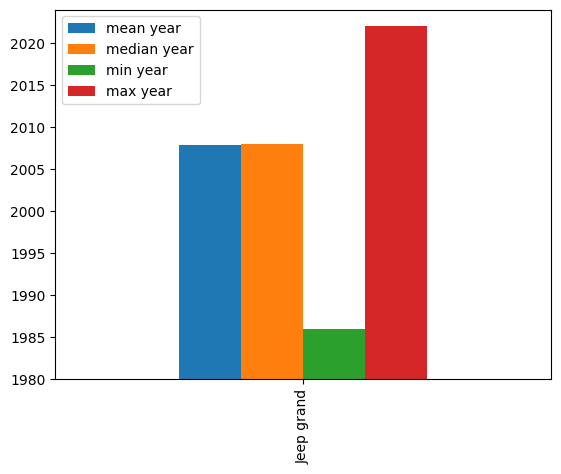

In [63]:
df[["mean year","median year","min year","max year"]][0:1].plot.bar(ylim=[1980,2024])

<em><strong>4.11 Jeep Grand Cherokee insights (Most popular vehicle in market): </strong></em>

<ul>
    <li>"Average mileage: 140.72 mil miles</li>
    <li>Median mileage: 140.00 mil miles</li>
    <li>Highest mileage: 334.00 mil miles</li>
    <li>Lowest mileage: 12.00 mil miles</li>
</ul>

<AxesSubplot: >

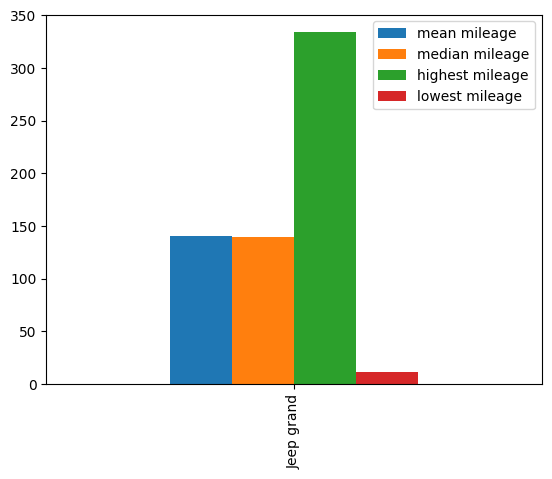

In [60]:
df[["mean mileage","median mileage","highest mileage","lowest mileage"]][0:1].plot.bar()

<h2>5 Conclusion</h2>

<p>The complete chart shows the current market in Marketplace</p>